# 2 - Plot Time Series

This notebook steps through creating time series plots of the biogeochemical parameters that we identified, selected, and saved as a new csv in the previous notebook **```1-Request-OOI-data.ipynb```**

In [4]:
# Import modules
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

##### Load data from notebook 1 into a Pandas Dataframe


In [5]:
df = pd.read_csv("../data/interim/irminger_sea_subset.csv")
df.head() # Print the first 5 rows of the DataFrame

,Cruise,Target_Asset,Start_Latitude,Start_Longitude,Start_Time,Cast,Cast_Flag,CTD_Bottle_Closure_Time,CTD_Latitude,CTD_Longitude,...,Discrete_Salinity_Flag,Discrete_Salinity_Replicate_Flag,CTD_Oxygen,CTD_Oxygen_Flag,CTD_Oxygen_Saturation,Discrete_Oxygen,Discrete_Oxygen_Flag,Discrete_Oxygen_Replicate_Flag,Discrete_Chlorophyll,Discrete_Phosphate
0,KN221-04,Test Site #1,62.107,-31.381667,2014-09-08T11:39:06.000Z,1,*0000000000000100,2014-09-08T12:07:58.000Z,62.10702,-31.38174,...,NaN,NaN,6.3251,*0000000000000100,7.30825,NaN,NaN,NaN,NaN,NaN
1,KN221-04,Test Site #1,62.107,-31.381667,2014-09-08T11:39:06.000Z,1,*0000000000000100,2014-09-08T12:08:10.000Z,62.10702,-31.38176,...,NaN,NaN,6.3326,*0000000000000100,7.30829,NaN,NaN,NaN,NaN,NaN
2,KN221-04,Test Site #1,62.107,-31.381667,2014-09-08T11:39:06.000Z,1,*0000000000000100,2014-09-08T12:08:22.000Z,62.10702,-31.38176,...,NaN,NaN,6.3246,*0000000000000100,7.30832,NaN,NaN,NaN,NaN,NaN
3,KN221-04,Test Site #1,62.107,-31.381667,2014-09-08T11:39:06.000Z,1,*0000000000000100,2014-09-08T12:08:30.000Z,62.10702,-31.38176,...,NaN,NaN,6.2751,*0000000000000100,7.30832,NaN,NaN,NaN,NaN,NaN
4,KN221-04,Test Site #1,62.107,-31.381667,2014-09-08T11:39:06.000Z,1,*0000000000000100,2014-09-08T12:08:38.000Z,62.10702,-31.38174,...,NaN,NaN,6.2838,*0000000000000100,7.30835,NaN,NaN,NaN,NaN,NaN


##### Select a specific site
OOI uses the term "Target Asset" to identify which buoy, glider/auv deployments, etc is associated with a particular CTD cast. For example, the target asset "SUMO" refers to the Global Irminger Apex Surface (SU) Mooring (MO). 

In [3]:
# display unique Target_Asset
df.Target_Asset.unique() # display unique one column

array(['Test Site #1', 'Test Site #2', 'Test site #3', 'Test site #4',
       'GI01SUMO', 'GI02HYPM', 'N102 Mooring', 'Glider test',
       'release test', 'GI02HYPM-1', 'Gliders', 'GI03FLMA-2',
       'GI03FLMB-2', 'GI03FLMB-1', 'GI02HYPM-2', 'GI01SUMO-2',
       'Release test', 'SUMO', 'HYPM', 'FLMA', 'FLMB', 'Release test 1',
       'Release test 2', 'Release test 3', 'Release test 4',
       'Release test 5', 'Release test 6', 'SSSG test cast', 'Glider box',
       'Release Test', 'OSNAP caldip-1', 'OSNAP caldip-2', 'Test Cast',
       'OSNAP M4', 'OSNAP CV4', 'OSNAP CAB', 'OSNAP M1', 'OSNAP M2',
       'OSNAP C12', 'OSNAP C01', 'OSNAP M3', 'Gliders 2', 'CL1', 'CL2',
       'Acoustic Release', 'GI03FLMA', 'GI03FLMB', 'CASISUS',
       'GI01SUMO, GI02HYPM', 'GI01SUMO, GI02HYPM, Gliders', 'CTD test',
       'near gliders', 'OSNAP Optode caldip', 'SUMO 7', 'HYPM 6',
       'SUMO 6 & 7', 'OSNAP M1 / M2', 'FLMB 6 & 7', 'near FLMB-6',
       'HYMP-7', 'HYPM-7', 'Test cast', 'Acoustic rel

In [8]:
# Query cast data for a particular target mooring and reset the index
sumo = df[df['Target_Asset'].str.contains("SUMO")]
sumo.reset_index(inplace=True)
sumo.head()

,index,Cruise,Target_Asset,Start_Latitude,Start_Longitude,Start_Time,Cast,Cast_Flag,CTD_Bottle_Closure_Time,CTD_Latitude,...,Discrete_Salinity_Flag,Discrete_Salinity_Replicate_Flag,CTD_Oxygen,CTD_Oxygen_Flag,CTD_Oxygen_Saturation,Discrete_Oxygen,Discrete_Oxygen_Flag,Discrete_Oxygen_Replicate_Flag,Discrete_Chlorophyll,Discrete_Phosphate
0,54,KN221-04,GI01SUMO,59.924167,-39.509333,2014-09-11T22:48:32.000Z,5,*0000000000000100,2014-09-11T23:17:06.000Z,59.91976,...,*0000000000000100,*0000000000000100,4.6565,*0000000000000100,7.33166,6.494,*0000000000000100,*0000000000000100,NaN,0.757431
1,55,KN221-04,GI01SUMO,59.924167,-39.509333,2014-09-11T22:48:32.000Z,5,*0000000000000100,2014-09-11T23:28:19.000Z,59.91816,...,*0000000000000100,*0000000000000100,5.0284,*0000000000000100,7.32346,6.526,*0000000000000100,*0000000000000100,NaN,NaN
2,56,KN221-04,GI01SUMO,59.924167,-39.509333,2014-09-11T22:48:32.000Z,5,*0000000000000100,2014-09-11T23:36:09.000Z,59.91706,...,*0000000000000100,*0000000000000100,5.0580,*0000000000000100,7.26561,6.481,*0000000000000100,*0000000000000100,NaN,NaN
3,57,KN221-04,GI01SUMO,59.924167,-39.509333,2014-09-11T22:48:32.000Z,5,*0000000000000100,2014-09-11T23:44:03.000Z,59.91578,...,NaN,NaN,4.8944,*0000000000000100,7.07312,NaN,NaN,NaN,NaN,NaN
4,58,KN221-04,GI01SUMO,59.924167,-39.509333,2014-09-11T22:48:32.000Z,5,*0000000000000100,2014-09-11T23:44:22.000Z,59.91574,...,*0000000000000100,*0000000000000100,4.8982,*0000000000000100,7.07281,6.750,*0000000000000100,*0000000000000100,NaN,0.693823


In [7]:
# List out the available parameters
print(sumo.columns)

Index(['index', 'Cruise', 'Target_Asset', 'Start_Latitude', 'Start_Longitude',
       'Start_Time', 'Cast', 'Cast_Flag', 'CTD_Bottle_Closure_Time',
       'CTD_Latitude', 'CTD_Longitude', 'CTD_Pressure', 'CTD_Pressure_Flag',
       'CTD_Depth', 'CTD_pH', 'CTD_pH_Flag', 'Discrete_pH', 'pH_Analysis_Temp',
       'Discrete_pH_Flag', 'Discrete_pH_Replicate_Flag', 'Calculated_pH',
       'Discrete_Nitrate', 'Discrete_Nutrients_Flag',
       'Discrete_Nutrients_Replicate_Flag', 'CTD_Fluorescence',
       'CTD_Fluorescence_Flag', 'Discrete_Fluorescence_Flag',
       'Discrete_Fluorescence_Replicate_Flag', 'CTD_Temperature_1',
       'CTD_Temperature_1_Flag', 'CTD_Temperature_2', 'CTD_Temperature_2_Flag',
       'CTD_Salinity_1', 'CTD_Salinity_2', 'Discrete_Salinity',
       'Discrete_Salinity_Flag', 'Discrete_Salinity_Replicate_Flag',
       'CTD_Oxygen', 'CTD_Oxygen_Flag', 'CTD_Oxygen_Saturation',
       'Discrete_Oxygen', 'Discrete_Oxygen_Flag',
       'Discrete_Oxygen_Replicate_Flag', 'Dis

### Plot Data
Now, we are ready to plot data.

In [9]:
plot_vars = sumo[["CTD_Depth", "Discrete_Oxygen", "Discrete_Nitrate"]]
plot_vars

,CTD_Depth,Discrete_Oxygen,Discrete_Nitrate
0,1483.447,6.494,11.296021
1,888.824,6.526,NaN
2,493.864,6.481,NaN
3,102.087,NaN,NaN
4,102.230,6.750,7.709425
...,...,...,...
287,44.388,6.434,7.348000
288,24.282,6.499,NaN
289,16.365,6.524,6.185000
290,16.365,NaN,5.418000


Set some of the plot's global variables, colors, etc.

In [11]:
# Select a color map
cast_cmap = mpl.colormaps['Accent'].reversed() # Reversed in attempt to improve colorblind-friendliness

# Get the time variable
time = pd.to_datetime(sumo["CTD_Bottle_Closure_Time"], yearfirst=True, utc=True).values

Text(0.5, 0, 'Time')

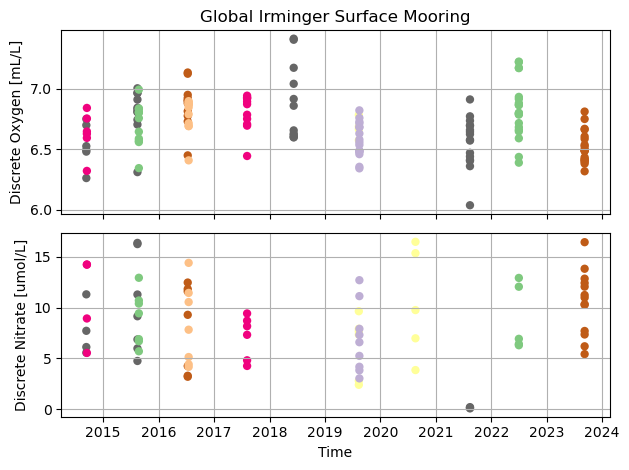

In [14]:
# Create the subplots
fig, axs = plt.subplots(2, 1, sharex=True, layout="tight")
# Discrete Oxygen
plt.subplot(2,1,1)
plt.scatter(x=time, y=sumo["Discrete_Oxygen"], c=sumo["Cast"].astype(float), cmap=cast_cmap, edgecolors="none")
plt.grid()
axs[0].set_ylabel("Discrete Oxygen [mL/L]")
axs[0].set_title('Global Irminger Surface Mooring')

# Discrete Nitrate
plt.subplot(2,1,2)
plt.scatter(x=time, y=sumo["Discrete_Nitrate"], c=sumo["Cast"].astype(float), cmap=cast_cmap, edgecolors="none")
plt.grid()
axs[1].set_ylabel("Discrete Nitrate [umol/L]")
axs[1].set_xlabel("Time")



Save the figure 

In [15]:
fig.savefig("../data/figures/OOI-Irminger-Sea_SUMO_oxy_nitrate_timeseries.png", transparent=False, facecolor="white", edgecolor="black", bbox_inches="tight")